In [1]:
#the process should be followed in the preprocesing
#step1 : import necessary libraries
#step2: load the dataset
#step3: initial data inspection
#step4: check for missing values
#step5: handle missing values
#step6: detect and remove duplicates
#step7: identify and handle outliers
#step8: encode categorical values
#step9:feature scaling
#step10: split the datasets into train and test

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("dataset.csv")

# 1. Handle Missing Values (if any)
df.dropna(inplace=True)

# 2. Feature Engineering
df['Earthquake_Occurred'] = (df['Magnitude'] >= 4.5).astype(int)

# 3. Define Features and Target
X = df[['Latitude', 'Longitude', 'Depth','Magnitude']]
y = df['Earthquake_Occurred']              # For classification

# 4. Split into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train shape:", X_train_scaled.shape)
print("X_test shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (2175, 4)
X_test shape: (544, 4)
y_train shape: (2175,)
y_test shape: (544,)


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [4]:
df=pd.read_csv("dataset.csv")
df

,Latitude,Longitude,Depth,Magnitude
0,29.06,77.42,5.0,2.5
1,19.93,72.92,5.0,2.4
2,31.50,74.37,33.0,3.4
3,28.34,76.23,5.0,3.1
4,27.09,89.97,10.0,2.1
...,...,...,...,...
2714,12.30,94.80,10.0,4.8
2715,24.70,94.30,40.0,4.1
2716,22.50,88.10,10.0,3.6
2717,24.60,94.20,54.0,3.5


In [5]:
df.head()


,Latitude,Longitude,Depth,Magnitude
0,29.06,77.42,5.0,2.5
1,19.93,72.92,5.0,2.4
2,31.50,74.37,33.0,3.4
3,28.34,76.23,5.0,3.1
4,27.09,89.97,10.0,2.1


In [6]:
df.tail()

,Latitude,Longitude,Depth,Magnitude
2714,12.3,94.8,10.0,4.8
2715,24.7,94.3,40.0,4.1
2716,22.5,88.1,10.0,3.6
2717,24.6,94.2,54.0,3.5
2718,14.5,92.9,10.0,4.6


In [7]:
#sanity check
#shape
df.shape

(2719, 4)

In [8]:
#df.info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2719 entries, 0 to 2718
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   2719 non-null   float64
 1   Longitude  2719 non-null   float64
 2   Depth      2719 non-null   float64
 3   Magnitude  2719 non-null   float64
dtypes: float64(4)
memory usage: 85.1 KB


In [9]:
#finding miss value
df.isnull().sum()

,0
Latitude,0
Longitude,0
Depth,0
Magnitude,0


In [10]:
df.isnull().sum()/df.shape[0]*100 #it gives percentage of missing value here there are no missing values

,0
Latitude,0.0
Longitude,0.0
Depth,0.0
Magnitude,0.0


In [11]:
#data analysis for understanding the data and distribution of data
df.describe()


,Latitude,Longitude,Depth,Magnitude
count,2719.000000,2719.000000,2719.000000,2719.000000
mean,29.939433,80.905638,53.400478,3.772196
std,7.361564,10.139075,68.239737,0.768076
min,0.120000,60.300000,0.800000,1.500000
25%,25.700000,71.810000,10.000000,3.200000
50%,31.210000,76.610000,15.000000,3.900000
75%,36.390000,92.515000,82.000000,4.300000
max,40.000000,99.960000,471.000000,7.000000


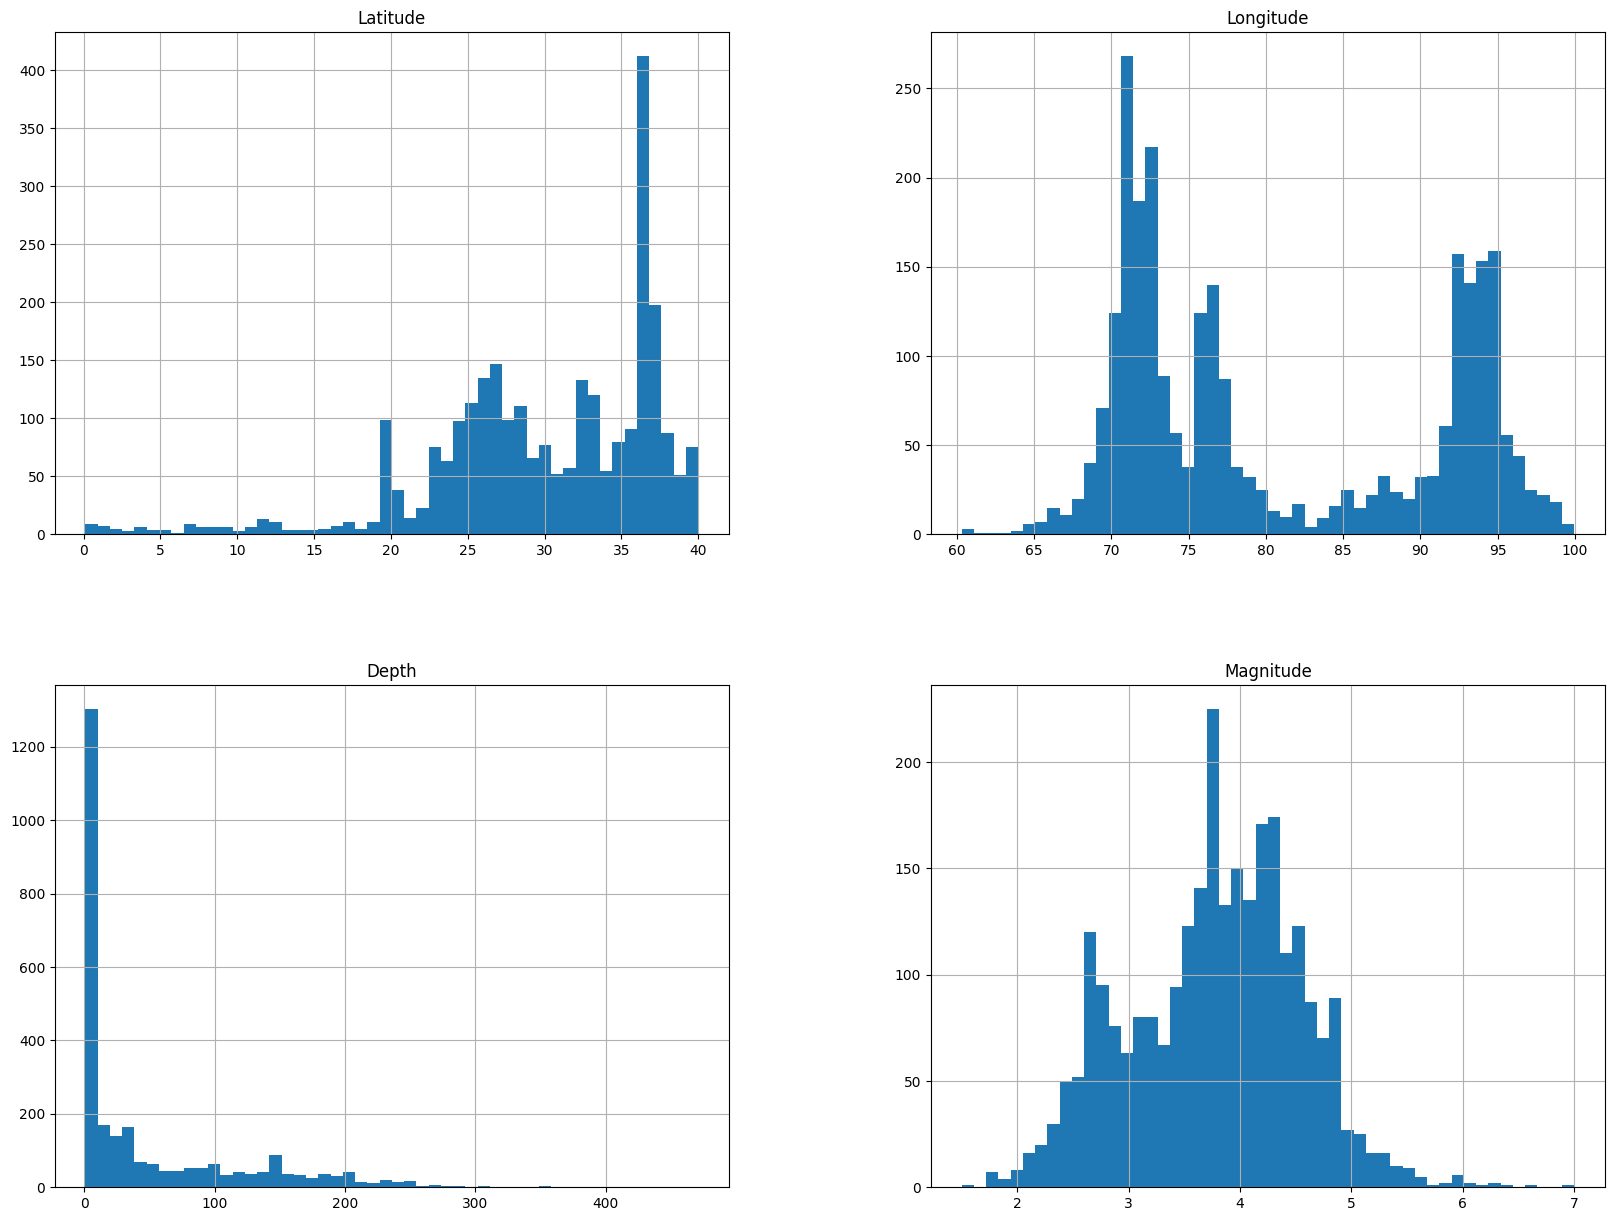

In [12]:
#draw histogram to understand the data
df.hist(bins=50,figsize=(20,15))
plt.show()


In [13]:
#missing value treatment
#like mean,median,mode      #if continous missing value it has to fill with  median or mean or if discrete or categorical it is filled with  mode

for i in ["Latitude","Longitude"]:
  df[i] = df[i].fillna(df[i].median())
print(df)



      Latitude  Longitude  Depth  Magnitude
0        29.06      77.42    5.0        2.5
1        19.93      72.92    5.0        2.4
2        31.50      74.37   33.0        3.4
3        28.34      76.23    5.0        3.1
4        27.09      89.97   10.0        2.1
...        ...        ...    ...        ...
2714     12.30      94.80   10.0        4.8
2715     24.70      94.30   40.0        4.1
2716     22.50      88.10   10.0        3.6
2717     24.60      94.20   54.0        3.5
2718     14.50      92.90   10.0        4.6

[2719 rows x 4 columns]


In [14]:
df.isnull().sum()



,0
Latitude,0
Longitude,0
Depth,0
Magnitude,0


In [15]:
#if we wnt to remove duplicates
df.drop_duplicates(inplace=True)
df

,Latitude,Longitude,Depth,Magnitude
0,29.06,77.42,5.0,2.5
1,19.93,72.92,5.0,2.4
2,31.50,74.37,33.0,3.4
3,28.34,76.23,5.0,3.1
4,27.09,89.97,10.0,2.1
...,...,...,...,...
2714,12.30,94.80,10.0,4.8
2715,24.70,94.30,40.0,4.1
2716,22.50,88.10,10.0,3.6
2717,24.60,94.20,54.0,3.5
